In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read excel file from Dataset folder

df = pd.read_excel('Dataset/cust_data.xlsx')

df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [3]:
df.shape

(30000, 38)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [5]:
# Data Modeling

from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import silhouette_score

In [6]:
df.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [7]:
# Data Cleaning, Feature selection

X1 = df.drop(['Cust_ID', 'Gender', 'Orders'], axis = 1)

In [8]:
param_grid = {
    'n_clusters': range(2, 5),
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500],
    'tol': [1e-4, 1e-3, 1e-2],
    'random_state': [42]
}

best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    kmeans = KMeans(**params)
    kmeans.fit(X1)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X1, labels)
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_params = params

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)

Best Parameters: {'init': 'random', 'max_iter': 100, 'n_clusters': 2, 'random_state': 42, 'tol': 0.01}
Best Silhouette Score: 0.43049895814989647


In [9]:
final_kmeans_model = KMeans(init = 'random', max_iter = 100, random_state = 42, tol = 0.01, n_clusters = 2).fit(X1)

labels = final_kmeans_model.labels_
silhouette_avg = silhouette_score(X1, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.43049895814989647


In [10]:
labels

array([1, 0, 1, ..., 1, 1, 1])

In [11]:
from sklearn.decomposition import PCA
principal=PCA(n_components=1)
principal.fit(X1)
x=principal.transform(X1)

In [12]:
x.ravel()

array([-1.23099579,  3.67880105, -0.16810096, ..., -1.18256249,
       -1.12933071, -0.00537772])

In [13]:
cluster_df = pd.DataFrame({'Cust_ID' : df.Cust_ID,'PCA1' : x.ravel(), 'cluster' : labels})

cluster_df

,Cust_ID,PCA1,cluster
0,1,-1.230996,1
1,2,3.678801,0
2,3,-0.168101,1
3,4,-0.998450,1
4,5,2.719362,0
...,...,...,...
29995,29996,-1.224980,1
29996,29997,-1.212499,1
29997,29998,-1.182562,1
29998,29999,-1.129331,1


In [14]:
cluster_df.columns

Index(['Cust_ID', 'PCA1', 'cluster'], dtype='object')

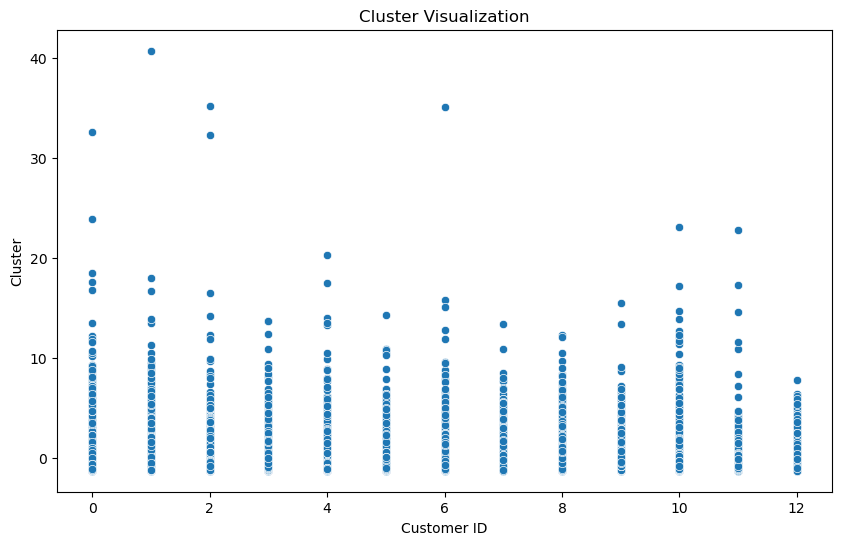

In [15]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(data=cluster_df, x=df['Orders'], y='PCA1', palette='Set1')

plt.title('Cluster Visualization')  # Set the title
plt.xlabel('Customer ID')  # Label for the x-axis
plt.ylabel('Cluster')  # Label for the y-axis

plt.show()

<Axes: xlabel='cluster', ylabel='count'>

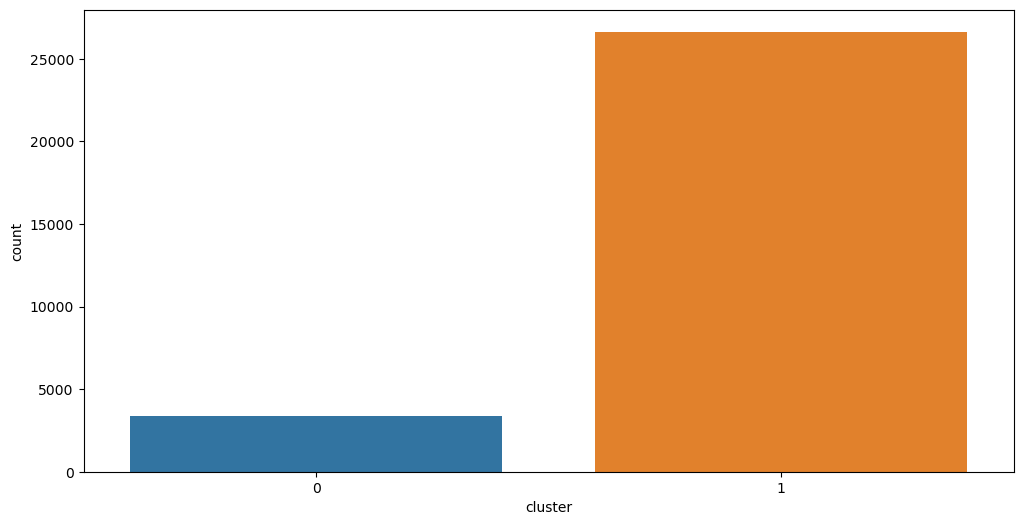

In [16]:
plt.figure(figsize = (12,6))
sns.countplot(cluster_df['cluster'])

In [17]:
from sklearn.decomposition import PCA

principal=PCA(n_components=2)
principal.fit(X1)
pca=principal.transform(X1)

In [18]:
pca

array([[-1.23099528e+00,  1.42004304e-02],
       [ 3.67880235e+00, -1.24391217e+00],
       [-1.68099631e-01, -5.26826175e-01],
       ...,
       [-1.18256078e+00,  2.70212310e-05],
       [-1.12933095e+00, -3.54999913e-02],
       [-5.37872812e-03, -6.01518233e-01]])

In [19]:
pca_df = pd.DataFrame(pca, columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,-1.230995,0.014200
1,3.678802,-1.243912
2,-0.168100,-0.526826
3,-0.998450,-0.082488
4,2.719361,-0.882505
...,...,...
29995,-1.224980,0.012892
29996,-1.212498,0.011559
29997,-1.182561,0.000027
29998,-1.129331,-0.035500


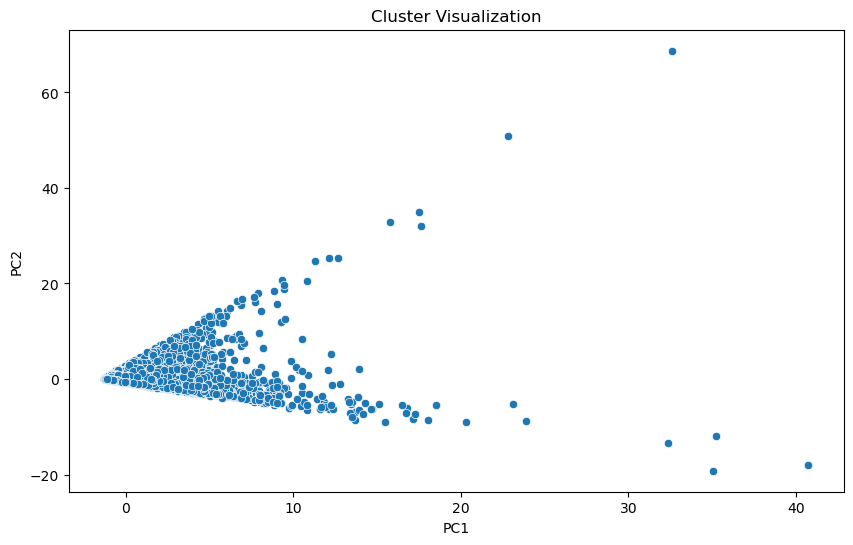

In [21]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(data=pca_df, x='PC1', y='PC2', palette='Set1')

plt.title('Cluster Visualization')  # Set the title
plt.xlabel('PC1')  # Label for the x-axis
plt.ylabel('PC2')  # Label for the y-axis

plt.show()